## 1) MNIST Regression

The aim of this exercise is to get some experience with logistic regression and regularisation. We
shall use the implementations in sklearn for this exercise.1
* Using the SGCClassifier and the LogisticRegression, build classifiers for the MNIST dataset.
* Find some handwritten digits which your classifiers are not capable of classifying correctly.
How do they differ from correctly classified digits?
* Scan over hyper-parameters (i.e. l1, l2 regularisation, different optimisers) and compare the
performance.
* Compare your results to results you would have obtained by pure random guessing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression, SGDClassifier

# You can then create instances of them
log_reg = LogisticRegression()
sgd_clf = SGDClassifier()

In [15]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
num_train_images = train_X.shape[0]
num_test_images = test_X.shape[0]
orig_test_ims = test_X



In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
# need to make each image 1D
train_X = train_X.reshape(num_train_images, -1)
test_X = test_X.reshape(num_test_images, -1)
print(train_X.shape)


(60000, 784)


In [5]:
# inspect an image
print(train_X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [6]:
# we need to scale the data!
train_X = train_X/255
test_X = test_X/255

print (train_X[0])



[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
logReg = LogisticRegression(max_iter = 1000)
sgd = SGDClassifier()

fittedLogReg = logReg.fit(train_X, train_y)
fittedSgd = sgd.fit(train_X, train_y)

In [8]:
logReg_score = fittedLogReg.score(test_X, test_y)
sgd_score = fittedSgd.score(test_X, test_y)
print('log reg score: ', logReg_score)
print('log reg score: ', sgd_score)

logReg_predictions = fittedLogReg.predict(test_X)
sgd_predictions = fittedSgd.predict(test_X)

log reg score:  0.926
log reg score:  0.9093


[7 2 1 ... 4 5 6]


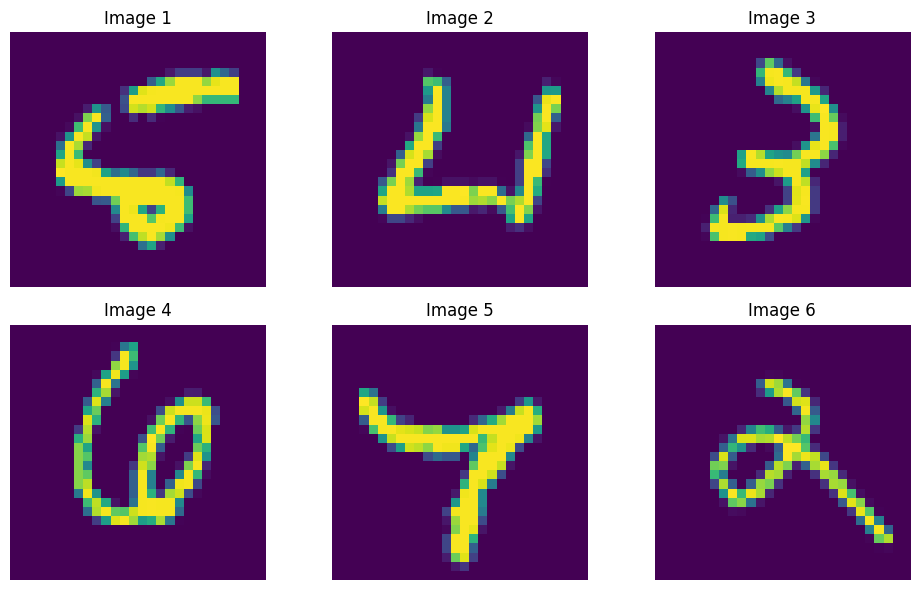

In [20]:
print(logReg_predictions)
logReg_diff = logReg_predictions - test_y
counter = 0
inds_to_plot = []
while counter < 6:
    for i in range(len(logReg_diff)):
        if logReg_diff[i] != 0:
            counter += 1
            inds_to_plot.append(i)


fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# 2. Iterate through your images and the axes *at the same time*.
# 'axes.flat' turns the 2x3 grid into a simple 1D list to loop over.
for i, ax in enumerate(axes.flat):
    # Get your specific image for this loop
    current_image = orig_test_ims[inds_to_plot[i]]

    # 3. Plot to the *specific axis* (ax) using 'ax.imshow()'
    # NOT plt.imshow()
    im = ax.imshow(current_image, cmap='viridis')

    # You can also customize each subplot
    ax.set_title(f"Image {i+1}")
    ax.axis('off') # Hides the x and y axis ticks, common for images

# Optional: Add a single colorbar for the whole figure
# fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)

# 4. Show the *entire figure* once, *after* the loop is finished.
plt.tight_layout() # Helps prevent titles/labels from overlapping
plt.show()


## 1D Ising - Regression

In [21]:
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

In [22]:
energies[0:10]

array([-4.,  0., -4.,  4.,  4.,  8., -4.,  0., 12.,  4.])

In [24]:
statesold=states
print(states.shape)

(10000, 40)


In [ ]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
statesold2=states
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]

(10000, 40, 40)


In [26]:
print(np.shape(states))
print(np.shape(energies))

(10000, 1600)
(10000,)
